#### Phân tích lỗi

### Data vlsp 2018 + Model có BI

In [ ]:
import pandas as pd

data_error = pd.read_csv("/Users/phamvanmanh/Documents/GitHub/NER_MOCKPROJECT/crf_model/vlsp2018/out_2018_1.csv")

Error: Kernel is dead

In [149]:
data_error

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
0,0,0,6,M,O,O,0
1,0,1,ngư,N,O,O,0
2,0,2,dân,N,O,B-LOC,1
3,0,3,Quảng,Np,B-LOC,I-LOC,1
4,0,4,Ngãi,Np,I-LOC,I-LOC,0
...,...,...,...,...,...,...,...
64550,3207,51,học,V,I-ORG,I-ORG,0
64551,3207,52,Hoàng,Np,I-ORG,I-ORG,0
64552,3207,53,Hoa,Np,I-ORG,I-ORG,0
64553,3207,54,Thám,Np,I-ORG,I-ORG,0


In [173]:
ner_tags = data_error["true_ner"].unique()

In [174]:
data_error_BI[(data_error_BI['is_error'] ==1) & (data_error_BI.true_ner == "MISC")]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
3281,114,2,báo,V,MISC,O,1
3282,114,3,chí,N,MISC,O,1
3283,114,4,Việt,Np,MISC,O,1
7069,233,3,Lễ,Np,MISC,O,1
7070,233,4,hội,N,MISC,O,1
...,...,...,...,...,...,...,...
62276,2890,47,Tiếng,N,MISC,O,1
62277,2890,48,Anh,N,MISC,O,1
62528,2895,0,Cha,N,MISC,O,1
62529,2895,1,mẹ,N,MISC,O,1


### Analyst error by columns

In [176]:
# find word index near
def get_data_error(df, num_sent, dist_size):
    """
    function get_data_error: phân tích lỗi xung quanh từ bị lỗi
    df: DataFrame để phân tích gồm các columns (#sent, #word, word, true_pos, true_ner,predict_ner,is_error)
    dist_size: khoảng cách xung quanh từ bị lỗi
    num_sent: câu nằm trong câu
    """
    is_error = 1
    col_name = "#sent"
    data_test = df
    df_condition = data_test.loc[(data_test[col_name] ==  num_sent)]
    df_condition_is_error = df_condition.loc[df_condition["is_error"] == is_error]
    
    if len(df_condition_is_error) ==  0:
        return  print("Not exited data row by condition this")

    else:
        
        word_near = df_condition_is_error["#word"].iloc[0]
        word_least = df_condition_is_error["#word"].iloc[-1]
        max_len = df_condition["#word"].iloc[-1]

        if word_near <= dist_size:
            word_index_left = 0
        else:
            word_index_left = word_near - dist_size 

        if dist_size >= max_len - word_least:
            word_index_right = -1

        else:
            word_index_right = word_least + dist_size


        if word_index_right == -1:
            rs_df = df_condition.iloc[word_index_left:]
        else:
            rs_df = df_condition.iloc[word_index_left:word_index_right + 1]
        return rs_df


In [177]:
get_data_error(data_error_BI, 6,1)

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
83,6,0,ĐÌNH,N,PER,O,1
84,6,1,THUNG,Np,PER,O,1


In [159]:
pip install regex

     |████████████████████████████████| 288 kB 1.1 MB/s 
You should consider upgrading via the '/Users/phamvanmanh/Desktop/machine/mlenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [166]:
import re
import regex
def is_capitalized(token):
    if regex.search(r"^\p{Lu}(\p{Ll}|_)*$", token):
        return True
    else:
        return False

def isACRONYM(token):
    """Check if a token is an ACRONYM or not
    """
    if regex.search(r"^(\p{Lu}\p{Ll}?\.)+.*$", token):
        return True
    else:
        return False

def isName(token):
    """Check if a token is a NAME
       (the first letter of each unit (in case of Vietnamese) is a capital letter)
       For example, Hà_Nội
    Parameter
    ----------
    token: String
    Return
    ----------
    True or False
    """
    all_units = token.split('_')
    if len(all_units) == 0:
        return False
    for u in all_units:
        if u == '' or (not u.isalpha()) or u[0].islower():
            return False
    return True

In [171]:
isName("Mạnh")

True

In [89]:
data_condition = data_error_BI[(data_error_BI["is_error"] ==  1) & (data_error_BI["true_ner"] == "LOC")]
data_condition.groupby("word").size().sort_values(ascending=False)

word
Nam           19
Việt          14
Anh           14
Bắc            9
bản            9
              ..
Ruta           1
Glasgow        1
Giải           1
SR1            1
Philippine     1
Length: 375, dtype: int64

In [136]:
idx =data_error_BI[(data_error_BI["is_error"] ==  1) & (data_error_BI["true_ner"] == "LOC")]["#word"] - 1

In [115]:
data_c = data_error_BI[(data_error_BI["is_error"] ==  1) & (data_error_BI["true_ner"] == "LOC")]

In [116]:
data_c[data_c["#word"].isin(idx)].groupby("word").size().sort_values(ascending=False)

word
Nam          18
Việt         13
Anh          12
Bắc           9
thành         9
             ..
Ranh          1
Red           1
Rock          1
Rohtang       1
Phe-ra-ra     1
Length: 366, dtype: int64

In [147]:
data_condition = data_error_BI[(data_error_BI["is_error"] ==  1) & (data_error_BI["predict_ner"] == "LOC") & (data_error_BI["word"] == "xã")]
data_condition

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
44427,2263,77,xã,N,ORG,LOC,1
63014,2948,38,xã,N,ORG,LOC,1
63057,2953,14,xã,N,ORG,LOC,1


In [145]:
get_data_error(data_error_BI, 5, 718)

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
16022,718,0,Ngày,N,O,O,0
16023,718,1,22,M,O,O,0
16024,718,2,/,F,O,O,0
16025,718,3,9,M,O,O,0
16026,718,4,",",F,O,O,0
16027,718,5,công,N,ORG,O,1
16028,718,6,an,A,ORG,O,1
16029,718,7,huyện,N,ORG,LOC,1
16030,718,8,Nghi,Np,ORG,LOC,1
16031,718,9,Lộc,Np,ORG,LOC,1


In [11]:
data_error_BI.loc[((data_error_BI['#sent'] ==  233) )]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
7066,233,0,Nhảy,V,O,O,0
7067,233,1,sạp,N,O,O,0
7068,233,2,ở,V,O,O,0
7069,233,3,Lễ,Np,MISC,O,1
7070,233,4,hội,N,MISC,O,1
7071,233,5,Hang,Np,MISC,O,1
7072,233,6,Bua,Np,MISC,O,1
7073,233,7,.,F,O,O,0
7074,233,8,Ảnh,Np,O,O,0
7075,233,9,:,F,O,O,0


In [16]:
data_error_BI.loc[((data_error_BI['#sent'] ==  233) )].iloc[word_index_left:]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
7066,233,0,Nhảy,V,O,O,0
7067,233,1,sạp,N,O,O,0
7068,233,2,ở,V,O,O,0
7069,233,3,Lễ,Np,MISC,O,1
7070,233,4,hội,N,MISC,O,1
7071,233,5,Hang,Np,MISC,O,1
7072,233,6,Bua,Np,MISC,O,1
7073,233,7,.,F,O,O,0
7074,233,8,Ảnh,Np,O,O,0
7075,233,9,:,F,O,O,0


In [ ]:
data_error_BI.loc[((data_error_BI['#sent'] ==  233) & (data_error_BI["is_error"] == 1))]["#word"].iloc[-1]

Error: Kernel is dead

In [96]:
# số lượng LOC nhầm sang ORG, PER, O, MISC
import matplotlib.pyplot as plt

def show_analyst_error(df, ner_tag = "B-LOC", is_error = 1):
    print(ner_tag)
    if ner_tag != "all":
        df_check = df.loc[(df.is_error == is_error) & (df.true_ner == ner_tag)]
        print(ner_tag)
        fig = plt.figure(figsize=(4, 3), dpi=80)
        ax = fig.add_axes([0,0,1,1])
   
        fig.suptitle('Error of ' + ner_tag )
        df_check_grouped = df_check.groupby("predict_ner").size()
        ner_tag = df_check_grouped.keys()
        values = df_check_grouped
        ax.bar(ner_tag,values)
        return plt.show()
    
    if ner_tag == "all":
        ner_tags = df["true_ner"].unique()
        for ner in ner_tags:
            df_check = df.loc[(df.is_error == is_error) & (df.true_ner == ner)]
            fig = plt.figure(figsize=(4, 3), dpi=80)
            ax = fig.add_axes([0,0,1,1])
            fig.suptitle('Error of ' +ner )
            df_check_grouped = df_check.groupby("predict_ner").size()
            ner_tag = df_check_grouped.keys()
            values = df_check_grouped
            ax.bar(ner_tag,values)
            
        return plt.show()

all


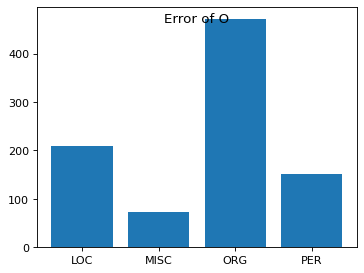

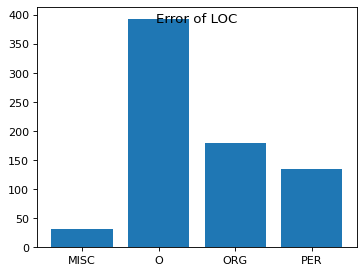

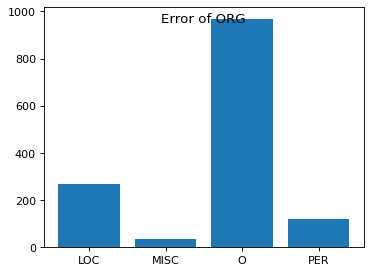

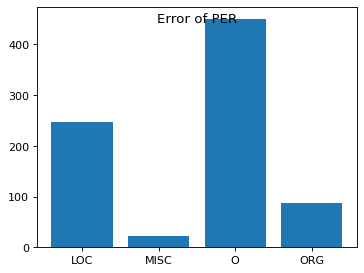

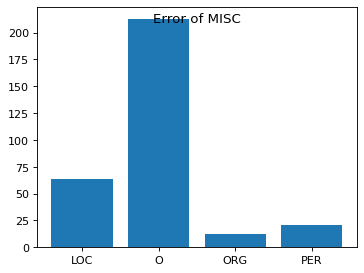

In [111]:
show_analyst_error(data_error_BI, ner_tag = "all", is_error = 1)

Nhãn B-MISC nhầm sang các nhãn: B-LOC, B-ORG, I-LOC..., chủ yếu nhầm sang nhãn O

In [109]:
df_MISC = data_error.loc[(data_error.is_error == 1) & (data_error.true_ner == "MISC")]
# df_per.groupby("word").size().sort_values(ascending=False)
# data_error.loc[(data_error.true_ner == "MISC") & (data_error.is_error == 1)]["#sent"].unique()
df_MISC[df_MISC['#sent'] == 2890]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
62276,2890,47,Tiếng,N,MISC,O,1
62277,2890,48,Anh,N,MISC,O,1


In [58]:
data_error.loc[data_error["#sent"] == 517]
data_error.loc[data_error["#sent"] == 2895]

,#sent,#word,word,true_pos,true_ner,predict_ner,is_error
61593,2895,0,Cha,N,B-MISC,O,1
61594,2895,1,mẹ,N,I-MISC,O,1
61595,2895,2,Việt,Np,I-MISC,O,1
61596,2895,3,kể,V,O,O,0
61597,2895,4,chuyện,N,O,O,0
61598,2895,5,vui,A,O,O,0
61599,2895,6,hội,N,O,O,0
61600,2895,7,phụ,V,O,O,0
61601,2895,8,huynh,N,O,O,0
61602,2895,9,các,L,O,O,0


nhầm nhãn

In [71]:
pip install pyvi

     |████████████████████████████████| 8.5 MB 346 kB/s 
     |████████████████████████████████| 186 kB 6.2 MB/s 
You should consider upgrading via the '/Users/phamvanmanh/Desktop/machine/mlenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
from pyvi import ViTokenizer, ViPosTagger

In [102]:
ViPosTagger.postagging("Nghĩa")[1]

['Np']